In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import polyfit
from numpy.polynomial import Polynomial

# Preprocessing

In [2]:
listOfDir = {'A':"A-1.08 cm.txt",
             'B':"B-4.05 cm.txt",
             'C':"C-1.32 cm.txt",
             'D':"D-1.56 cm.txt",
             'E':"E-3.12 cm.txt",
             'F':"F-2.52 cm.txt",
             'G':"G-2.16 cm.txt",
             'H':"H-3.66 cm.txt",
             'IS':"Initial Spectrum.txt"}
Length = [1.08,4.05,1.32,1.56,3.12,2.52,2.16,3.66]
def load_file(dir):
    df = pd.read_csv("C:/Users/chadoulis/PycharmProjects/optoilektroniki_1/data/"+dir, sep="\t", header=None)
    return df

def turn_df_to_float(df):
    h,w = df.shape
    for i in range(h):
        for j in range(w):
            df.iloc[i,j] = str(df.iloc[i,j]).replace(',','.')
            df.iloc[i,j] = float(df.iloc[i,j])
    return df

In [3]:
for waveguide in listOfDir.keys():
    df_temp = load_file(listOfDir[waveguide])
    df_temp = turn_df_to_float(df_temp)
    exec(f'{waveguide} = df_temp')

In [4]:
#Merging data into one dataframe (df_all)

df_all = pd.DataFrame()
df_all['Wavelength']=list(A.iloc[:,0])
for waveguide in listOfDir.keys():
    exec(f'df_all[str({waveguide})]=list({waveguide}.iloc[:,1])')
df_all.columns = ['Wavelength']+list(listOfDir.keys())

# FtF Loss

$FtF Loss = P_{out} - P_{in} - 2dB$

In [5]:
for i in range(1,len(df_all.T)-1):
    df_all.iloc[:,i] = df_all.iloc[:,i]-df_all.iloc[:,-1]-2
FtfLoss = df_all

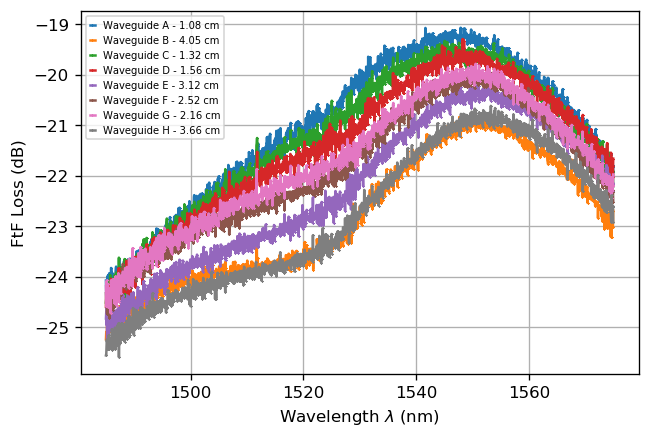

In [6]:
params = {'legend.fontsize': 6,
          'legend.handlelength': 0.5}
plt.rcParams.update(params)
plt.figure(dpi=120)
for i in range(1,len(df_all.T)-1):
    plt.plot(FtfLoss.iloc[:,0],FtfLoss.iloc[:,i], marker='.',label='Waveguide '+chr(64+i)+' - '+str(Length[i-1])+' cm', markersize=0.000000001)
plt.ylabel('FtF Loss (dB)')
plt.xlabel('Wavelength $\lambda$ (nm)')
plt.grid(True)
plt.legend(loc=2)
plt.savefig('C:/Users/chadoulis/Google Drive/CNSS/Optoelectronics/Assignment1/FtfLoss.png',dpi=300)
plt.show()

## Linear Fitting

In [7]:
indices = [float(i) for i in range(1485,1574,5)]
FtfLoss_Step5 = FtfLoss.set_index('Wavelength')
FtfLoss_Step5 = FtfLoss_Step5.loc[indices]

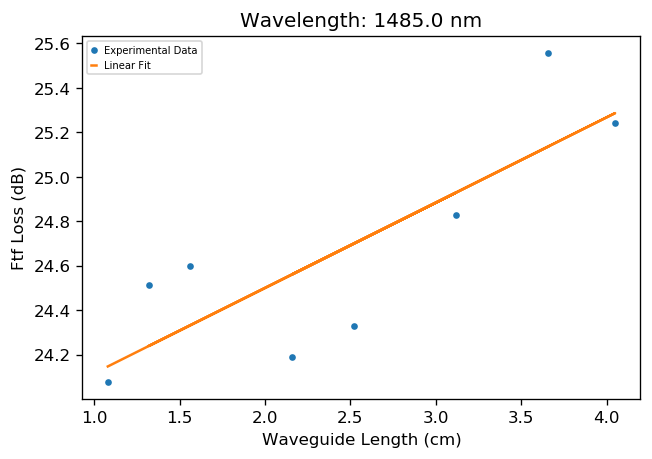

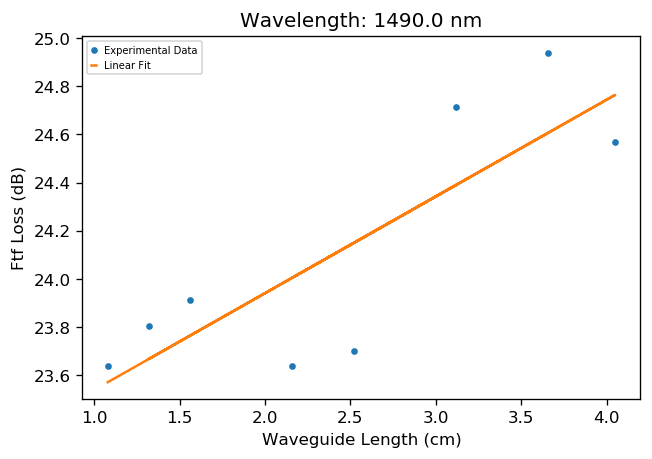

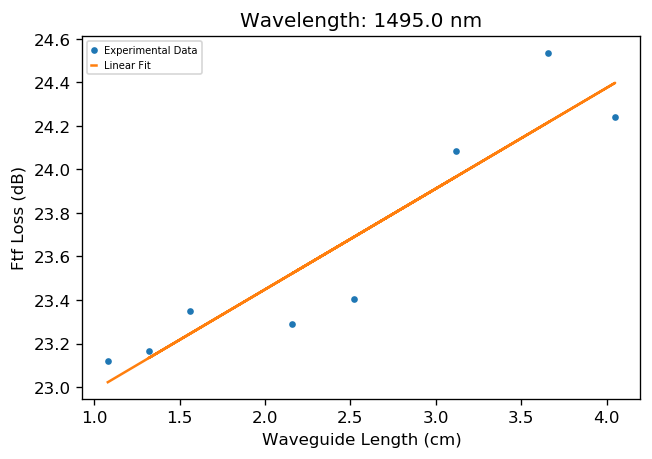

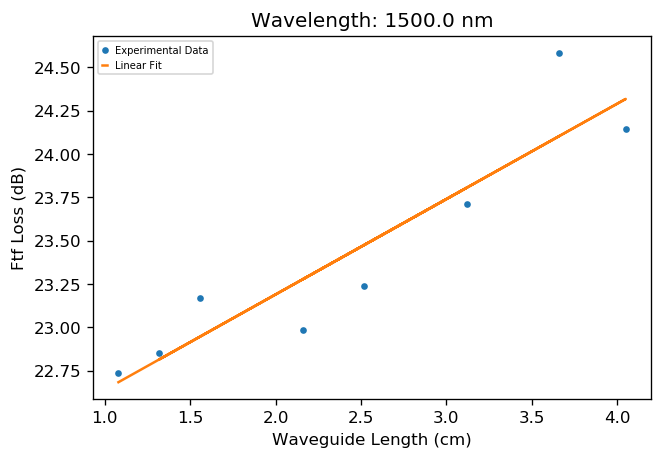

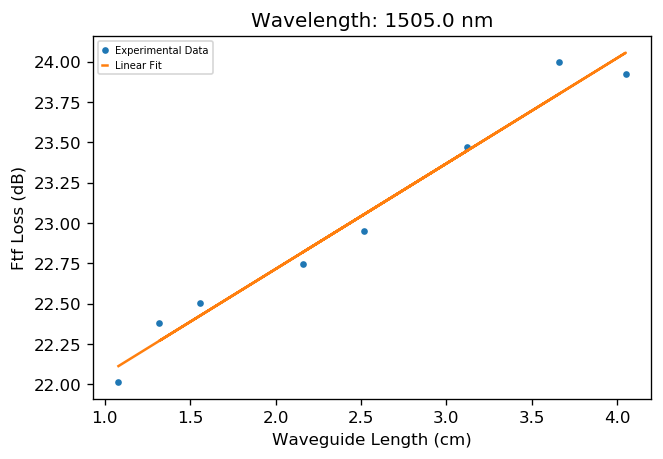

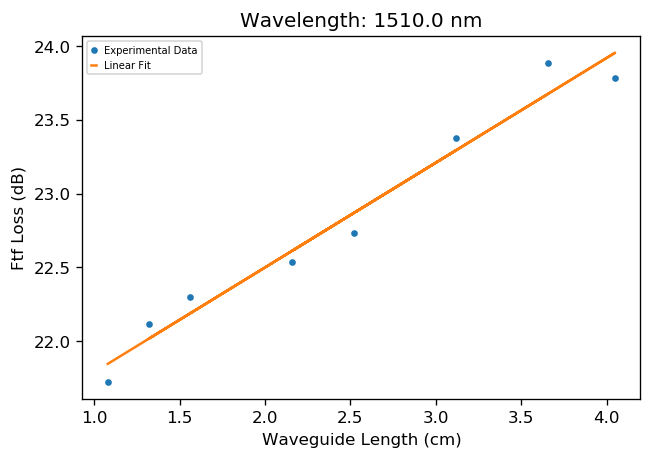

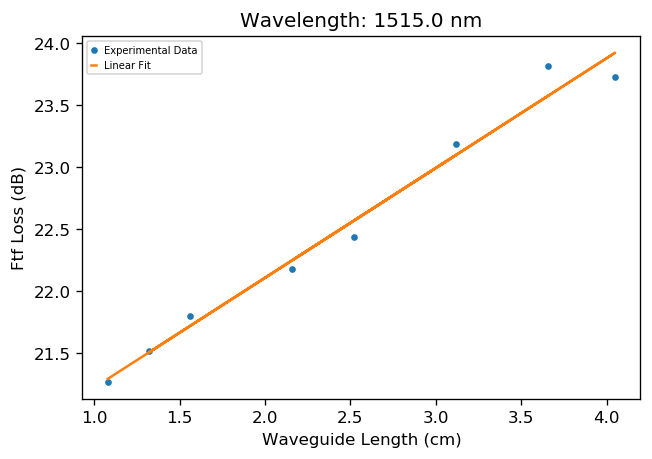

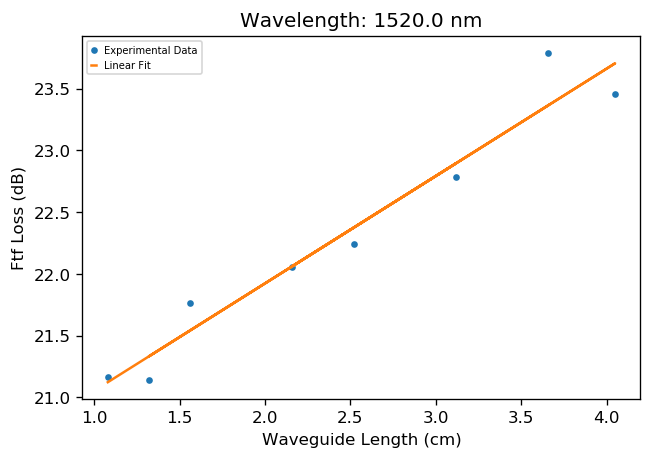

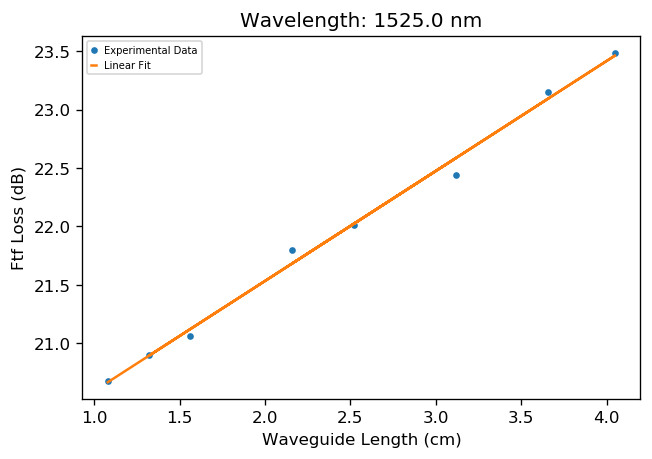

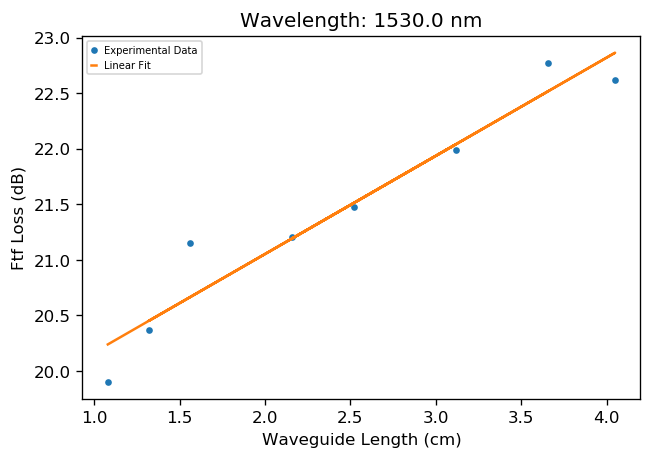

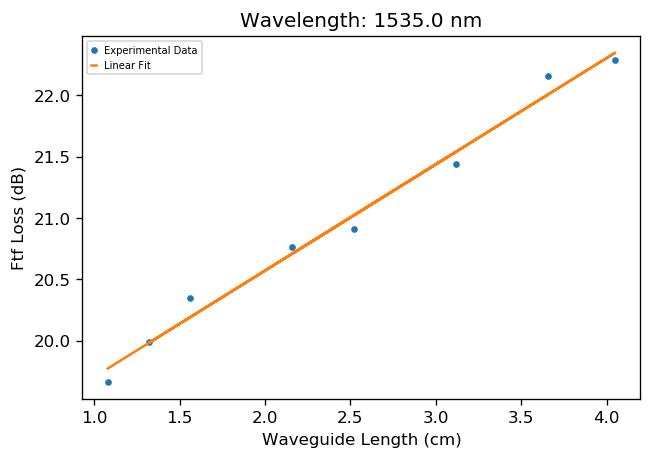

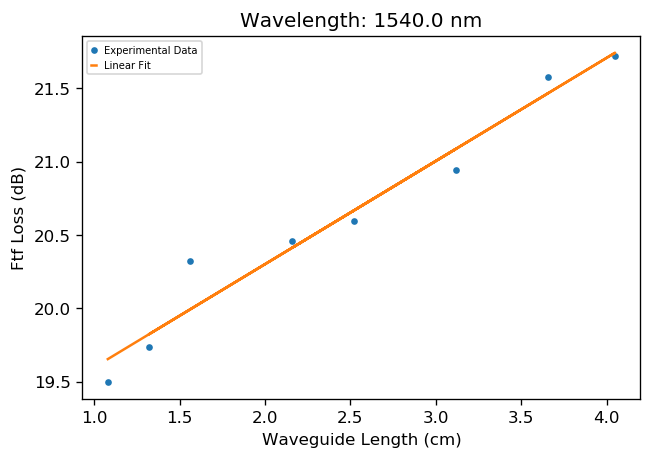

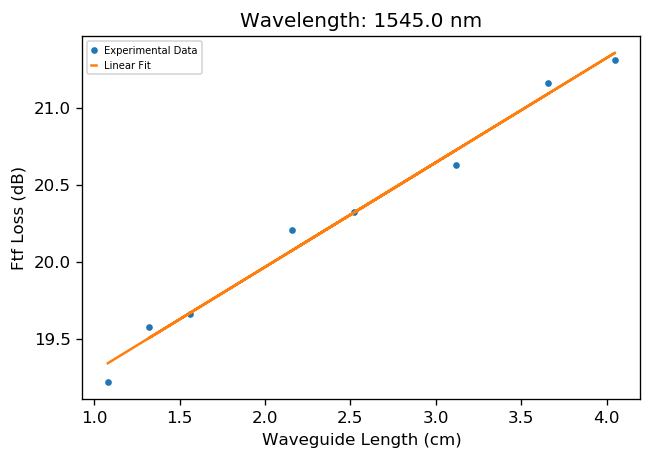

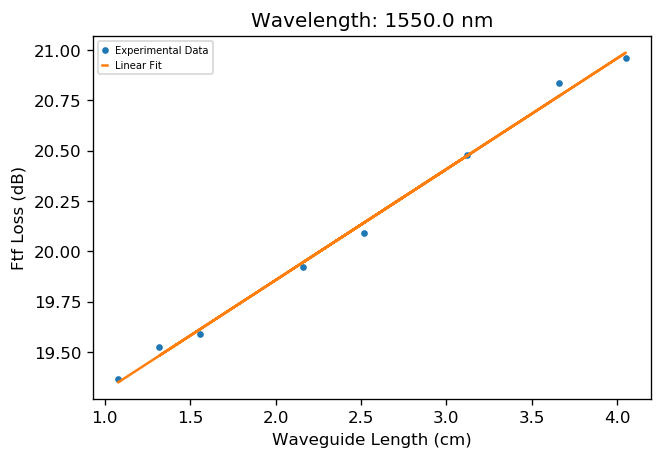

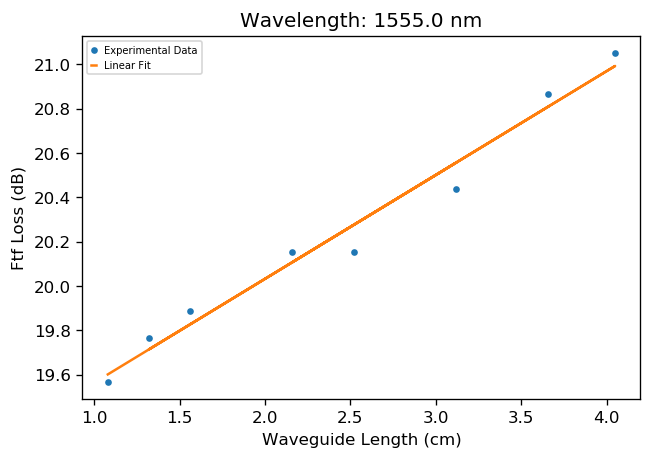

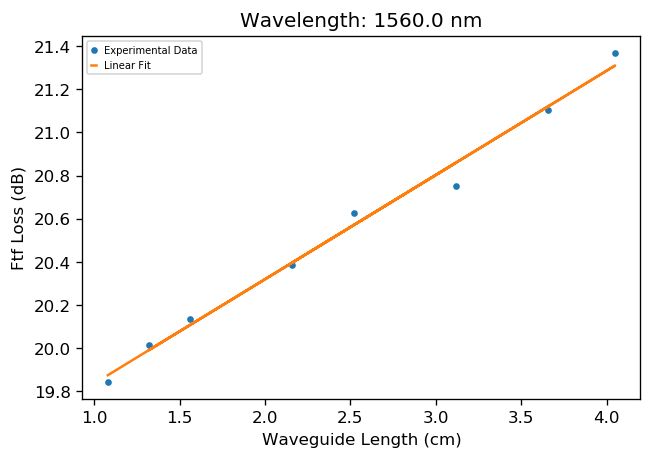

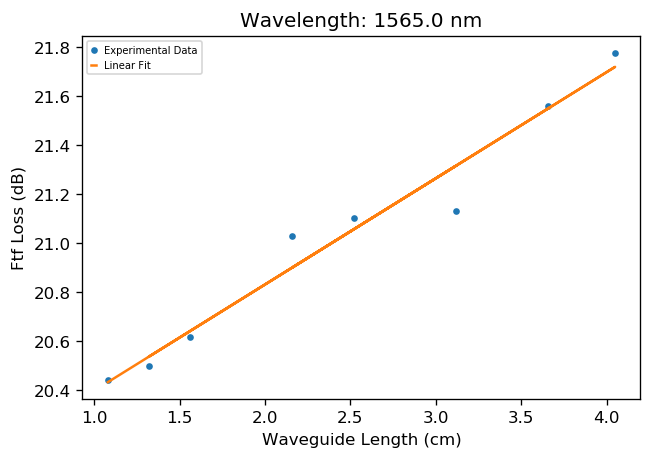

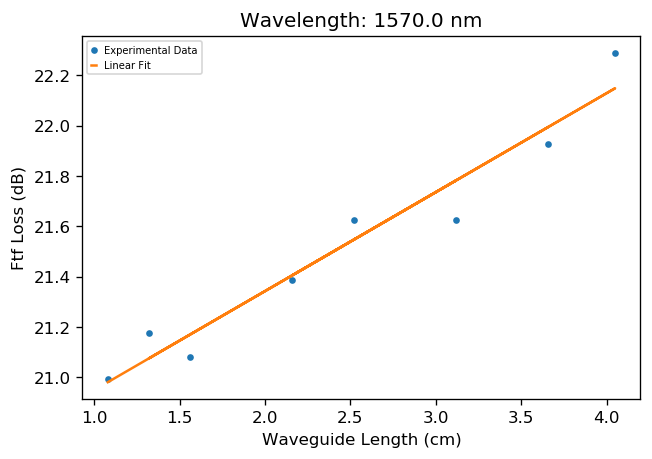

In [8]:
mlist = []
for i in range(18):
    x = np.array(Length)
    y = -np.array(list(FtfLoss_Step5.iloc[i,:-1]))
    b, m = polyfit(x, y, 1)
    mlist.append(m)
    params = {'legend.fontsize': 6,
          'legend.handlelength': 0.5}
    plt.rcParams.update(params)
    plt.figure(dpi=120)
    plt.title('Wavelength: {} nm'.format(str(indices[i])))
    plt.ylabel('Ftf Loss (dB)')
    plt.xlabel('Waveguide Length (cm)')
    plt.plot(x, y, '.',label = 'Experimental Data')
    plt.plot(x, b + m * x, '-',label='Linear Fit')
    plt.legend()
    plt.savefig('C:/Users/chadoulis/Google Drive/CNSS/Optoelectronics/Assignment1/LinearFit'+str(indices[i])+'.png',dpi=300)
    plt.show()

# Propagation Loss

In [9]:
a = []
for i in range(len(mlist)):
    a.append(np.mean(np.array(Length)*mlist[i]))

In [10]:
x = np.array(indices)
y = -np.array(a)

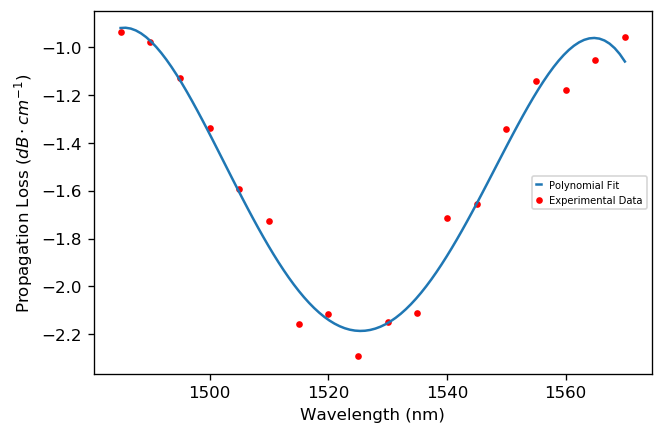

In [11]:
params = {'legend.fontsize': 6,
      'legend.handlelength': 0.5}
plt.rcParams.update(params)
plt.figure(dpi=120)
p = Polynomial.fit(x, y, 4)
plt.plot(*p.linspace(),label='Polynomial Fit')
plt.scatter(x,y,label = 'Experimental Data',marker='.',color='red')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Propagation Loss ($dB \cdot cm^{-1}$)')
plt.legend(loc=7)
plt.savefig('C:/Users/chadoulis/Google Drive/CNSS/Optoelectronics/Assignment1/PropagationLoss.png',dpi=300)
plt.show()

# GC Loss

$GC Loss = \frac{Ftf Loss - Propagation Loss}{2}$

In [12]:
PropagationLoss = p(np.array(FtfLoss.loc[:,'Wavelength']))
GCLossA = (np.array(FtfLoss.loc[:,'A'])-PropagationLoss)/2
GCLossB = (np.array(FtfLoss.loc[:,'B'])-PropagationLoss)/2
GCLossC = (np.array(FtfLoss.loc[:,'C'])-PropagationLoss)/2
GCLossD = (np.array(FtfLoss.loc[:,'D'])-PropagationLoss)/2
GCLossE = (np.array(FtfLoss.loc[:,'E'])-PropagationLoss)/2
GCLossF = (np.array(FtfLoss.loc[:,'F'])-PropagationLoss)/2
GCLossG = (np.array(FtfLoss.loc[:,'G'])-PropagationLoss)/2
GCLossH = (np.array(FtfLoss.loc[:,'H'])-PropagationLoss)/2

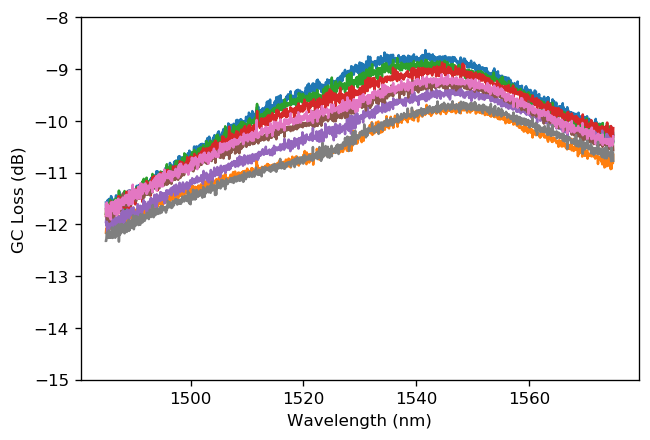

In [13]:
params = {'legend.fontsize': 6,
      'legend.handlelength': 0.5}
plt.rcParams.update(params)
plt.figure(dpi=120)
plt.plot(FtfLoss.loc[:,'Wavelength'],GCLossA)
plt.plot(FtfLoss.loc[:,'Wavelength'],GCLossB)
plt.plot(FtfLoss.loc[:,'Wavelength'],GCLossC)
plt.plot(FtfLoss.loc[:,'Wavelength'],GCLossD)
plt.plot(FtfLoss.loc[:,'Wavelength'],GCLossE)
plt.plot(FtfLoss.loc[:,'Wavelength'],GCLossF)
plt.plot(FtfLoss.loc[:,'Wavelength'],GCLossG)
plt.plot(FtfLoss.loc[:,'Wavelength'],GCLossH)
plt.ylabel('GC Loss (dB)')
plt.xlabel('Wavelength (nm)')
plt.ylim(-15,-8)
plt.show()

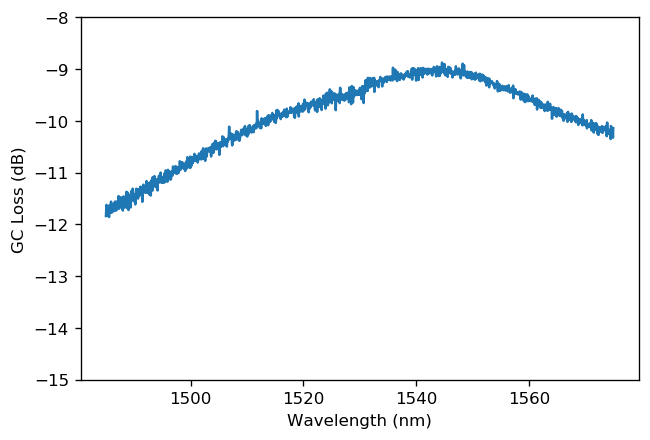

In [14]:
params = {'legend.fontsize': 6,
      'legend.handlelength': 0.5}
plt.rcParams.update(params)
plt.figure(dpi=120)
plt.plot(FtfLoss.loc[:,'Wavelength'],GCLossD)
plt.ylabel('GC Loss (dB)')
plt.xlabel('Wavelength (nm)')
plt.ylim(-15,-8)
plt.savefig('C:/Users/chadoulis/Google Drive/CNSS/Optoelectronics/Assignment1/GCLoss.png',dpi=300)
plt.show()

In [26]:
df_ap = pd.DataFrame(mlist,indices)

In [31]:
df_ap.T.to_latex()

'\\begin{tabular}{lrrrrrrrrrrrrrrrrrr}\n\\toprule\n{} &    1485.0 &    1490.0 &  1495.0 &    1500.0 &   1505.0 &    1510.0 &    1515.0 &   1520.0 &    1525.0 &    1530.0 &    1535.0 &    1540.0 &    1545.0 &    1550.0 &    1555.0 &    1560.0 &    1565.0 &    1570.0 \\\\\n\\midrule\n0 &  0.383696 &  0.401739 &   0.463 &  0.550106 &  0.65408 &  0.709024 &  0.886232 &  0.86907 &  0.941406 &  0.883467 &  0.866892 &  0.703603 &  0.679527 &  0.551456 &  0.468411 &  0.483198 &  0.432949 &  0.393566 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [ ]:
df_all['ap']= mlist

In [ ]:
len(mlist)

In [ ]:
len(A.iloc[:,0])

In [17]:
len(indices)

18

In [32]:
a

[0.9338189552554659,
 0.9777318436123713,
 1.1268260032139952,
 1.3388216253124758,
 1.5918663450474198,
 1.7255878820744188,
 2.1568678974830338,
 2.1150999014641534,
 2.2911463125107536,
 2.1501381502374133,
 2.1097972211567733,
 1.7123944872829302,
 1.6537989042019992,
 1.3421070982184236,
 1.1399947194042839,
 1.1759836308146094,
 1.0536893591201886,
 0.9578419640377273]